### Applied Data Science Capstone Project - Final Assignment by **Nan Chen**

In [1]:
!conda install -c conda-forge geopy --ye

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - geopy


The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.9.2-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [411]:
# To handle german characters

#!/usr/bin/env python
# -*- coding: iso-8859-1 -*-

import sys

# Encoding der Standardausgabe herausfinden
stdout_encoding = sys.stdout.encoding or sys.getfilesystemencoding()

# Nachricht definieren (durch das Encoding Cookie als iso-8859-1 gekennzeichnet)
#message = "Hallo Österreich"
#print(message)

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import json
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import folium
print('Libraries imported.')

Libraries imported.


In [413]:
from geopy.geocoders import Nominatim 
print("geopy installed")

geopy installed


In [39]:
#!conda install -c anaconda lxml

## Get the table of neighborhood from wiki

In [414]:
source = "https://de.wikipedia.org/wiki/Stadtbezirke_M%C3%BCnchens"

# Data wrangling
columns_filtered = ["Stadtbezirk", "Fläche(km²)", "Einwohner"]
df_unfiltered = pd.read_html(source)[0]
df = df_unfiltered.loc[:, columns_filtered]
df.rename(columns={"Stadtbezirk": "Neighborhood", "Fläche(km²)": "Area in km2", "Einwohner": "Population"}, inplace=True)
df.drop(df.tail(1).index, inplace = True)

df = df.astype({'Population': 'float32'})
df['Population'] *=1000
df = df.astype({'Population': 'int32'})
df

,Neighborhood,Area in km2,Population
0,Altstadt-Lehel,315,21126
1,Ludwigsvorstadt-Isarvorstadt,440,51933
2,Maxvorstadt,430,51834
3,Schwabing-West,436,68935
4,Au-Haidhausen,422,61654
5,Sendling,394,41256
6,Sendling-Westpark,781,60498
7,Schwanthalerhöhe,207,29611
8,Neuhausen-Nymphenburg,1291,100213
9,Moosach,1109,54872


In [415]:
df.shape

(25, 3)

## Get geographical data of all neighborhoods and plot them on the city map

In [416]:
# Get the center location of Munich city

geolocator = Nominatim(user_agent="munich_agent")
location = geolocator.geocode("Munich")
lat_munich = location.latitude
lon_munich = location.longitude
print('The geographical coordinate of Munich City are {}, {}.'.format(lat_munich, lon_munich))

The geographical coordinate of Munich City are 48.1371079, 11.5753822.


In [417]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
df_bezirk = pd.DataFrame(columns=column_names)
df_bezirk = df_bezirk.astype({'Latitude': 'float32', 'Longitude': 'float32'})
df_bezirk

,Neighborhood,Latitude,Longitude


In [418]:
for i in range(df.shape[0]):
    Bezirk = df.loc[i, 'Neighborhood']
    address = "{}, Munich".format(Bezirk)
    
    geolocator = Nominatim(user_agent="munich_agent")
    location = geolocator.geocode(address)
    df_bezirk.at[i, 'Neighborhood'] = Bezirk
    df_bezirk.at[i, 'Latitude'] = location.latitude
    df_bezirk.at[i, 'Longitude'] = location.longitude


In [101]:
df_result = pd.merge(df, df_bezirk, on="Neighborhood")
df_result

,Neighborhood,Area in km2,Population,Latitude,Longitude
0,Altstadt-Lehel,315,21126,48.137829,11.574582
1,Ludwigsvorstadt-Isarvorstadt,440,51933,48.130341,11.573366
2,Maxvorstadt,430,51834,48.151093,11.562418
3,Schwabing-West,436,68935,48.168270,11.569873
4,Au-Haidhausen,422,61654,48.128754,11.590536
5,Sendling,394,41256,48.118011,11.539083
6,Sendling-Westpark,781,60498,48.118031,11.519333
7,Schwanthalerhöhe,207,29611,48.133781,11.541057
8,Neuhausen-Nymphenburg,1291,100213,48.154221,11.531517
9,Moosach,1109,54872,48.179893,11.510571


Create a default map of Munich City using `folium` with all the neighborhoods superimposed on top.

In [419]:
map_munich = folium.Map(location=[lat_munich, lon_munich], zoom_start=11)
neighborhoods = df_result

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

## Explore each neighborhood by using `Foursquare API`

In [420]:
CLIENT_ID = '14MSIOBKGTYU0DW2F0ACYYXMFPX3ZGD34DJME3RAZUBAWZL1' # your Foursquare ID
CLIENT_SECRET = 'I0RNVIJDEMMKJ1P0T1S3MAVWOSWUMM5AFPMXA0QPFUEAZJ4H' # your Foursquare Secret
ACCESS_TOKEN = 'D0S1I0XLO2TFKAZISMH45CWTEDBFQTFG14LKQYXDIEPBMBDZ' # your FourSquare Access Token
VERSION = '20210101'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 14MSIOBKGTYU0DW2F0ACYYXMFPX3ZGD34DJME3RAZUBAWZL1
CLIENT_SECRET:I0RNVIJDEMMKJ1P0T1S3MAVWOSWUMM5AFPMXA0QPFUEAZJ4H


In [421]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [422]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): # radius of finding venues set to 500m
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [423]:
munich_data = df_result
munich_venues = getNearbyVenues(names = munich_data['Neighborhood'],
                                latitudes = munich_data['Latitude'],
                                longitudes = munich_data['Longitude']
                                )

Altstadt-Lehel
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Schwabing-West
Au-Haidhausen
Sendling
Sendling-Westpark
Schwanthalerhöhe
Neuhausen-Nymphenburg
Moosach
Milbertshofen-Am Hart
Schwabing-Freimann
Bogenhausen
Berg am Laim
Trudering-Riem
Ramersdorf-Perlach
Obergiesing-Fasangarten
Untergiesing-Harlaching
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Hadern
Pasing-Obermenzing
Aubing-Lochhausen-Langwied
Allach-Untermenzing
Feldmoching-Hasenbergl
Laim


Notice that no ventue is found by `Foursquare` within the neighborhood "Aubing-Lochhausen-Langwied". This is probably true, since it is already located outside of Munich urban circle (see its label marked in the city map above, the one farmost to the northwest)

In [424]:
print(munich_venues.shape)
munich_venues.head()

(632, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt-Lehel,48.137829,11.574582,Marienplatz,48.137125,11.575483,Plaza
1,Altstadt-Lehel,48.137829,11.574582,Fischbrunnen,48.137211,11.576047,Fountain
2,Altstadt-Lehel,48.137829,11.574582,Alois Dallmayr,48.138469,11.577372,Gourmet Shop
3,Altstadt-Lehel,48.137829,11.574582,Hirmer,48.138023,11.572046,Men's Store
4,Altstadt-Lehel,48.137829,11.574582,St. Peter,48.136530,11.575615,Church


In [425]:
munich_venues.groupby('Neighborhood').count()
print('There are {} uniques categories within {} neighborhoods.'.format(len(munich_venues['Venue Category'].unique()), len(munich_venues['Neighborhood'].unique())))

There are 168 uniques categories within 24 neighborhoods.


In [426]:
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")
munich_onehot['Neighborhood'] = munich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.shape

(632, 169)

In [137]:
munich_grouped = munich_onehot.groupby('Neighborhood').mean().reset_index()
munich_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,...,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,Altstadt-Lehel,0.000000,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.010000,0.0,0.000000,0.0,0.0,0.0
2,Au-Haidhausen,0.027778,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.027778,0.0,0.0,0.027778,0.0,0.000000,0.0,0.0,0.0
3,Berg am Laim,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,Bogenhausen,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0


In [427]:
num_top_venues = 5

for hood in munich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                 venue  freq
0          Supermarket  0.25
1            Drugstore  0.25
2  Sporting Goods Shop  0.12
3   Italian Restaurant  0.12
4      Automotive Shop  0.12


----Altstadt-Lehel----
                 venue  freq
0                 Café  0.08
1    German Restaurant  0.07
2                Plaza  0.06
3  Bavarian Restaurant  0.06
4                Hotel  0.05


----Au-Haidhausen----
                venue  freq
0     Thai Restaurant  0.06
1  Italian Restaurant  0.06
2        Concert Hall  0.06
3   French Restaurant  0.06
4   Afghan Restaurant  0.03


----Berg am Laim----
                  venue  freq
0           Supermarket  0.25
1                 Hotel  0.12
2             Drugstore  0.12
3  Fast Food Restaurant  0.12
4                Bakery  0.12


----Bogenhausen----
                venue  freq
0  Italian Restaurant  0.29
1                Bank  0.14
2                Park  0.14
3          Water Park  0.14
4            Bus Stop  0.14


----Feldmoch

In [428]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10 # top 10 kinds of venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = munich_grouped['Neighborhood']

for ind in np.arange(munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(24, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Supermarket,Drugstore,Sporting Goods Shop,Italian Restaurant,Automotive Shop,Bakery,Deli / Bodega,Department Store,Food,Fish Market
1,Altstadt-Lehel,Café,German Restaurant,Plaza,Bavarian Restaurant,Hotel,Boutique,Italian Restaurant,Coffee Shop,Gourmet Shop,Church
2,Au-Haidhausen,Thai Restaurant,French Restaurant,Italian Restaurant,Concert Hall,Cultural Center,Restaurant,Café,Pool,Plaza,Cocktail Bar
3,Berg am Laim,Supermarket,Hotel,Fast Food Restaurant,Gastropub,Café,Drugstore,Bakery,Yoga Studio,Doner Restaurant,Farmers Market
4,Bogenhausen,Italian Restaurant,Bank,Water Park,Park,Bus Stop,Greek Restaurant,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant
5,Feldmoching-Hasenbergl,Motorcycle Shop,German Restaurant,Bus Stop,Greek Restaurant,Yoga Studio,Food,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
6,Hadern,Supermarket,Ice Cream Shop,Bus Stop,Pharmacy,Liquor Store,Sushi Restaurant,Bus Line,Sandwich Place,German Restaurant,Trattoria/Osteria
7,Laim,Supermarket,Greek Restaurant,Plaza,Bank,Coffee Shop,Organic Grocery,Chinese Restaurant,Rental Car Location,Restaurant,Mobile Phone Shop
8,Ludwigsvorstadt-Isarvorstadt,Café,Bar,Pizza Place,Italian Restaurant,Vietnamese Restaurant,Cocktail Bar,Ice Cream Shop,Gay Bar,Museum,French Restaurant
9,Maxvorstadt,Café,Bar,Burrito Place,German Restaurant,Vietnamese Restaurant,Restaurant,Asian Restaurant,Bakery,Steakhouse,Sports Bar


## Neighborhood Clustering by `KMeans`

In [429]:
# set number of clusters
kclusters = 5 # number of clusters has been chosen to 5 after a fewer tries to get a good distribution

munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)
munich_grouped_clustering = np.nan_to_num(munich_grouped_clustering)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)
kmeans.labels_[0:]

array([0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 3, 0, 2, 3, 0, 0, 4, 2, 2, 2, 4, 1,
       0, 2])

**Re-check**: count the number for each cluster; choose another number of clusters if the distribution of clustering is not good

In [430]:
# Re-Check frequency of each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 6, 1: 1, 2: 11, 3: 4, 4: 2}

In [432]:
# add clustering labels into the dataframe

#neighborhoods_venues_sorted.drop(columns = 'Cluster Labels', inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
munich_merged = munich_data
munich_merged = munich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [433]:
munich_merged.head(10)

,Neighborhood,Area in km2,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt-Lehel,315,21126,48.137829,11.574582,2.0,Café,German Restaurant,Plaza,Bavarian Restaurant,Hotel,Boutique,Italian Restaurant,Coffee Shop,Gourmet Shop,Church
1,Ludwigsvorstadt-Isarvorstadt,440,51933,48.130341,11.573366,2.0,Café,Bar,Pizza Place,Italian Restaurant,Vietnamese Restaurant,Cocktail Bar,Ice Cream Shop,Gay Bar,Museum,French Restaurant
2,Maxvorstadt,430,51834,48.151093,11.562418,2.0,Café,Bar,Burrito Place,German Restaurant,Vietnamese Restaurant,Restaurant,Asian Restaurant,Bakery,Steakhouse,Sports Bar
3,Schwabing-West,436,68935,48.168270,11.569873,2.0,Park,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Organic Grocery,Plaza,Post Office,Chinese Restaurant,Café,Burger Joint
4,Au-Haidhausen,422,61654,48.128754,11.590536,2.0,Thai Restaurant,French Restaurant,Italian Restaurant,Concert Hall,Cultural Center,Restaurant,Café,Pool,Plaza,Cocktail Bar
5,Sendling,394,41256,48.118011,11.539083,2.0,German Restaurant,Supermarket,Hotel,Bakery,Café,Vietnamese Restaurant,Bank,Optical Shop,Pet Store,Soccer Field
6,Sendling-Westpark,781,60498,48.118031,11.519333,4.0,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Tunnel,Bus Stop,Gym / Fitness Center,Business Service,Bakery,Drugstore
7,Schwanthalerhöhe,207,29611,48.133781,11.541057,2.0,Café,Italian Restaurant,Pizza Place,Bar,Asian Restaurant,Burger Joint,French Restaurant,Coffee Shop,Salad Place,Grocery Store
8,Neuhausen-Nymphenburg,1291,100213,48.154221,11.531517,2.0,Bakery,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Park,Yoga Studio,Sandwich Place,Salon / Barbershop,Bus Stop,Restaurant
9,Moosach,1109,54872,48.179893,11.510571,0.0,Bakery,Drugstore,Hotel,Supermarket,Light Rail Station,Sandwich Place,Food,Bus Stop,Big Box Store,Motel


In [434]:
munich_merged.dropna(inplace=True) # drop a row without value
munich_merged = munich_merged.astype({"Cluster Labels": "int32"}) # set cluster labels as integer
munich_merged.head()

,Neighborhood,Area in km2,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt-Lehel,315,21126,48.137829,11.574582,2,Café,German Restaurant,Plaza,Bavarian Restaurant,Hotel,Boutique,Italian Restaurant,Coffee Shop,Gourmet Shop,Church
1,Ludwigsvorstadt-Isarvorstadt,440,51933,48.130341,11.573366,2,Café,Bar,Pizza Place,Italian Restaurant,Vietnamese Restaurant,Cocktail Bar,Ice Cream Shop,Gay Bar,Museum,French Restaurant
2,Maxvorstadt,430,51834,48.151093,11.562418,2,Café,Bar,Burrito Place,German Restaurant,Vietnamese Restaurant,Restaurant,Asian Restaurant,Bakery,Steakhouse,Sports Bar
3,Schwabing-West,436,68935,48.168270,11.569873,2,Park,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Organic Grocery,Plaza,Post Office,Chinese Restaurant,Café,Burger Joint
4,Au-Haidhausen,422,61654,48.128754,11.590536,2,Thai Restaurant,French Restaurant,Italian Restaurant,Concert Hall,Cultural Center,Restaurant,Café,Pool,Plaza,Cocktail Bar


In [435]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['Latitude'], munich_merged['Longitude'], munich_merged['Neighborhood'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Have a close look at one neighborhood cluster

Cluster 0 in red seems to be distinguished from other clusters by its fluent daily facilities. Let's take a closer look

In [437]:
# Cluster 0
df_c0 = munich_merged[munich_merged['Cluster Labels'] == 0]
df_c0

,Neighborhood,Area in km2,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Moosach,1109,54872,48.179893,11.510571,0,Bakery,Drugstore,Hotel,Supermarket,Light Rail Station,Sandwich Place,Food,Bus Stop,Big Box Store,Motel
13,Berg am Laim,631,47000,48.123482,11.633451,0,Supermarket,Hotel,Fast Food Restaurant,Gastropub,Café,Drugstore,Bakery,Yoga Studio,Doner Restaurant,Farmers Market
14,Trudering-Riem,2245,73479,48.123177,11.664078,0,Supermarket,Bakery,Hotel,Motel,Gym / Fitness Center,Italian Restaurant,Drugstore,Organic Grocery,Sandwich Place,German Restaurant
15,Ramersdorf-Perlach,1990,117918,48.100895,11.633371,0,German Restaurant,Bakery,Italian Restaurant,Supermarket,Diner,Plaza,Ice Cream Shop,Cultural Center,Cupcake Shop,Fast Food Restaurant
20,Pasing-Obermenzing,1650,76348,48.152363,11.468434,0,Bakery,Italian Restaurant,Supermarket,Restaurant,Spa,Cupcake Shop,Drugstore,Fish Market,Fast Food Restaurant,Farmers Market
22,Allach-Untermenzing,1545,34277,48.195156,11.462974,0,Supermarket,Drugstore,Sporting Goods Shop,Italian Restaurant,Automotive Shop,Bakery,Deli / Bodega,Department Store,Food,Fish Market


The table reveals that Cluster 0 often offers daily facilities such as Supermarket, Bakery and Drugstore, which are desired by senior people.

In [439]:
senior_desired = ['Supermarket', 'Bakery', 'Drugstore']

In [441]:
moosach_venues = munich_venues.loc[lambda munich_venues: munich_venues['Neighborhood'] == 'Moosach', :]
moosach_venues = moosach_venues.groupby('Venue Category').count()
moosach_venues = moosach_venues.loc[senior_desired,:]
moosach_venues = moosach_venues.loc[:,'Neighborhood']
moosach_venues

Venue Category
Supermarket    2
Bakery         6
Drugstore      3
Name: Neighborhood, dtype: int64

In [442]:
Berg_am_Laim_venues = munich_venues.loc[lambda munich_venues: munich_venues['Neighborhood'] == 'Berg am Laim', :]
Berg_am_Laim_venues = Berg_am_Laim_venues.groupby('Venue Category').count()
Berg_am_Laim_venues = Berg_am_Laim_venues.loc[senior_desired,:]
Berg_am_Laim_venues = Berg_am_Laim_venues.loc[:,'Neighborhood']
Berg_am_Laim_venues

Venue Category
Supermarket    2
Bakery         1
Drugstore      1
Name: Neighborhood, dtype: int64

In [443]:
Allach_Untermenzing_venues = munich_venues.loc[lambda munich_venues: munich_venues['Neighborhood'] == 'Allach-Untermenzing', :]
Allach_Untermenzing_venues = Allach_Untermenzing_venues.groupby('Venue Category').count()
Allach_Untermenzing_venues = Allach_Untermenzing_venues.loc[senior_desired,:]
Allach_Untermenzing_venues = Allach_Untermenzing_venues.loc[:,'Neighborhood']
Allach_Untermenzing_venues

Venue Category
Supermarket    2
Bakery         1
Drugstore      2
Name: Neighborhood, dtype: int64

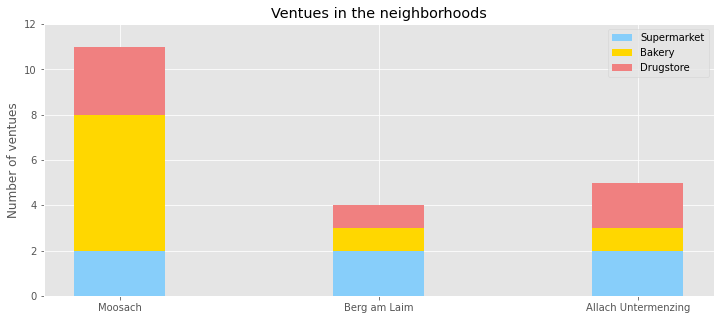

In [466]:
N = 3

NumSupermarket = (moosach_venues[0],Berg_am_Laim_venues[0],Allach_Untermenzing_venues[0])
NumBakery = (moosach_venues[1],Berg_am_Laim_venues[1],Allach_Untermenzing_venues[1])
NumDrugstore = (moosach_venues[2],Berg_am_Laim_venues[2],Allach_Untermenzing_venues[2])
    
width = 0.35       
fig, ax = plt.subplots(figsize=(12, 5))

colorlist = ['lightskyblue', 'gold', 'lightcoral']

for i in range(N):
    p1 = plt.bar(i, NumSupermarket[i], width=width, bottom=0, color=colorlist[0])
    p2 = plt.bar(i, NumBakery[i], width=width, bottom=NumSupermarket[i], color=colorlist[1])
    p3 = plt.bar(i, NumDrugstore[i], width=width, bottom=NumBakery[i]+NumSupermarket[i], color=colorlist[2])

plt.ylabel('Number of ventues')
plt.title('Ventues in the neighborhoods')
plt.xticks((0,1,2), ('Moosach', 'Berg am Laim', 'Allach Untermenzing'))
plt.yticks(np.arange(0, 14, 2))
plt.legend((p1[0],p2[0], p3[0]),('Supermarket', 'Bakery', 'Drugstore'))

plt.show()

The neighbohrhood "Moosach" stands out by its large number of Supermarkets, Bakeries and Drugstores. Thus, The neighbohrhood "Moosach" could be the first choice for the senior family to consider.